time after training the sets and cross validation = 0.9742834329954349 s
[0.88709677 0.89247312 0.63978495 0.87634409 0.88172043 0.89189189
 0.88648649]
Accuracy score = 0.8508282476024412
Test score = 0.8923076923076924
time for doing the learning curve = 14.17297245500231 s


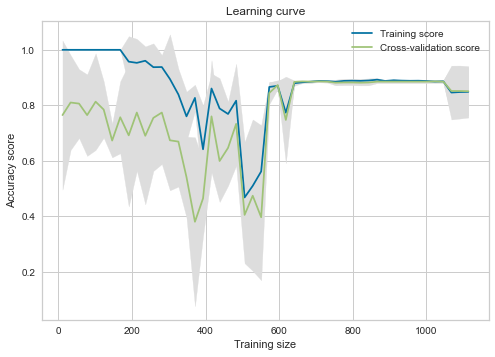

In [17]:
# Dataset 2 : Movies
# Output : Awards : Yes or No
# AdaBoostClassifier
import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt

# split your datas between training and test
from sklearn.model_selection import train_test_split
# comparing datas
from sklearn.metrics import accuracy_score
# model 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# cross validation
from sklearn.model_selection import cross_val_score
# validation curve
from yellowbrick.model_selection import validation_curve
# learning curve
from sklearn.model_selection import learning_curve
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()

#dataset
a = io.open('Movie Dataset.csv', encoding='latin-1')
df = pd.read_csv(a)
df = df.take([i for i in range(1300)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['Awards'])

#output
y = df['Awards']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

time1 = time.perf_counter()

model = AdaBoostClassifier()

model.fit(X_train,y_train)

validation = cross_val_score(model, X, y, cv=7)

#time after predicting the test sets
time2 = time.perf_counter()
timeA = time2 - time1
print('time after training the sets and cross validation =',timeA,'s')

print(validation)
print('Accuracy score =', validation.mean())

#Testing the test set
predictions = model.predict(X_test)
score = accuracy_score(y_test,predictions)
print('Test score =', score)

#Plot the learning curve
train_sizes, train_scores, valid_scores = learning_curve(AdaBoostClassifier() , 
                                                         X , y , 
                                                         train_sizes=np.linspace(0.01,1,50), 
                                                         cv=7, 
                                                         scoring = 'accuracy', 
                                                         n_jobs= -1)

time3 = time.perf_counter()
timeB = time3 - time2
print('time for doing the learning curve =',timeB,'s')

train_std = np.std(train_scores, axis = 1)
valid_std = np.std(valid_scores, axis = 1)

train_mean = np.mean(train_scores, axis = 1)
valid_mean = np.mean(valid_scores, axis = 1)

plt.plot(train_sizes,train_mean, label = 'Training score')
plt.plot(train_sizes,valid_mean, label = 'Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = '#DDDDDD')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color = '#DDDDDD')


plt.title('Learning curve')
plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.legend(loc ='best')


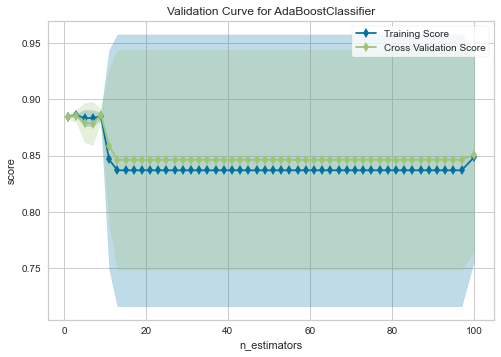

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for AdaBoostClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=7, estimator=AdaBoostClassifier(), param_name='n_estimators',
                param_range=array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97, 100]))
time for doing the validation and learning curve = 65.27758034600265 s


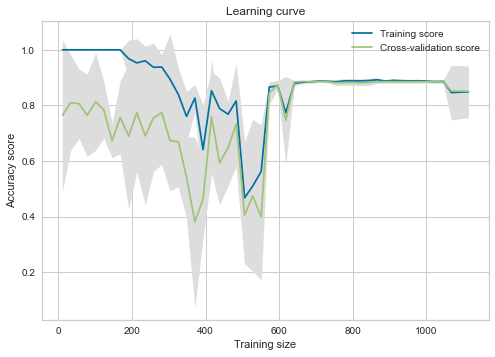

In [12]:
# Hyperparameters : 
# Vary : n_estimators

time1 = time.perf_counter()

#validation curve
print(validation_curve(AdaBoostClassifier() , 
                       X , y , 
                       param_name ='n_estimators', 
                       param_range=np.linspace(1,100,dtype="int"), 
                       cv=7, 
                       score='accuracy'))

#learning curve
train_sizes, train_scores, valid_scores = learning_curve(AdaBoostClassifier() , 
                                                         X , y , 
                                                         train_sizes=np.linspace(0.01,1,50), 
                                                         cv=7, 
                                                         scoring = 'accuracy', 
                                                         n_jobs= -1)

time2 = time.perf_counter()
timeA = time2 - time1
print('time for doing the validation and learning curve =',timeA,'s')

#means
train_mean = np.mean(train_scores, axis = 1)
valid_mean = np.mean(valid_scores, axis = 1)

#standard deviation
train_std = np.std(train_scores, axis = 1)
valid_std = np.std(valid_scores, axis = 1)

# plot the figure
plt.plot(train_sizes,train_mean, label = 'Training score')
plt.plot(train_sizes,valid_mean, label = 'Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = '#DDDDDD')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color = '#DDDDDD')

plt.title('Learning curve')
plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.legend(loc = 'best')

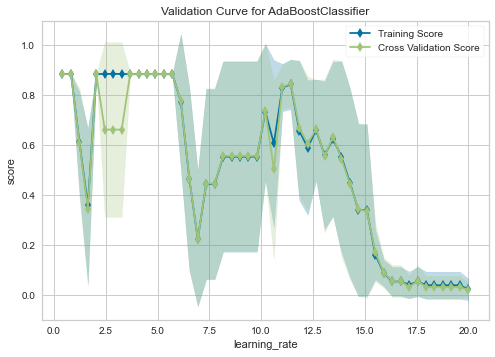

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for AdaBoostClassifier'}, xlabel='learning_rate', ylabel='score'>,
                cv=7, estimator=AdaBoostClassifier(n_estimators=5),
                param_name='learning_rate',
                param_range=array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89...
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ]))
time for doing the validation and l

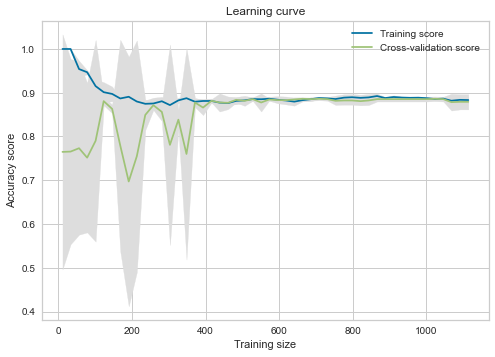

In [10]:
# Hyperparameters : n_estimators = 5
# Vary : learning_rate

time1 = time.perf_counter()

#validation curve
print(validation_curve(AdaBoostClassifier(n_estimators = 5) , 
                       X , y , 
                       param_name ='learning_rate', 
                       param_range=np.linspace(0,20,50), 
                       cv=7, 
                       score='accuracy'))

#learning curve
train_sizes, train_scores, valid_scores = learning_curve(AdaBoostClassifier(n_estimators = 5) , 
                                                         X , y , 
                                                         train_sizes=np.linspace(0.01,1,50), 
                                                         cv=7, 
                                                         scoring = 'accuracy', 
                                                         n_jobs= -1)

time2 = time.perf_counter()
timeA = time2 - time1
print('time for doing the validation and learning curve =',timeA,'s')

#means
train_mean = np.mean(train_scores, axis = 1)
valid_mean = np.mean(valid_scores, axis = 1)

#standard deviation
train_std = np.std(train_scores, axis = 1)
valid_std = np.std(valid_scores, axis = 1)

# plot the figure
plt.plot(train_sizes,train_mean, label = 'Training score')
plt.plot(train_sizes,valid_mean, label = 'Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = '#DDDDDD')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color = '#DDDDDD')

plt.title('Learning curve')
plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.legend(loc = 'best')

In [18]:
# Hyperparameters : n_estimators = 5, learning_rate = 0.5

time1 = time.perf_counter()

model = AdaBoostClassifier(n_estimators = 60, learning_rate = 0.5)

model.fit(X_train,y_train)
validation = cross_val_score(model, X, y, cv=7)
print(validation)
print('accuracy score for upgraded model= ', validation.mean())

#Testing the test set
predictions = model.predict(X_test)
score = accuracy_score(y_test,predictions)
print('Test score for the upgraded model =', score)

#time after training and testing the model
time2 = time.perf_counter()
timeA = time2 - time1
print('time for training the model =',timeA,'s')


print('----------')

#default model
model2 = AdaBoostClassifier()
model2.fit(X_train,y_train)
predictions = model2.predict(X_test)
validation2 = cross_val_score(model2, X, y, cv=7)
predictions2 = model2.predict(X_test)
score2 = accuracy_score(y_test,predictions2)
print(validation2[1:])
print('accuracy score default model = ', validation2[1:].mean())
print('Test score default model =', score2)




[0.88709677 0.89247312 0.88709677 0.87634409 0.88172043 0.89189189
 0.88648649]
accuracy score for upgraded model=  0.8861585087391539
Test score for the upgraded model = 0.8923076923076924
time for training the model = 1.136276461998932 s
----------
[0.89247312 0.63978495 0.87634409 0.88172043 0.89189189 0.88648649]
accuracy score default model =  0.8447834931705899
Test score default model = 0.8923076923076924
